## Model 1
In this notebook we will explore an initial model to be used as a baseline.  In the teams table, we will see how the predictive power of preseason odds and midseason points (standings) are for the target variable of playoff wins (with 16 winning the Stanley Cup).

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

After the usual imports, we will import a csv which contains all NHL teams individual seasons from 2006 - 2023. We will keep the 2024 season off to the side until we have a model worth using to predict the outcome of the current season.

**Data Dictionary**
- TEAM - All teams active for each individual season (2006 - 2023). See notes below.
- Preseason_Odds - Signifies chances of winning stanley cup (lower suggests a better team). See notes below.
- Midseason_Pts - Total at each season's trade deadline (more points equals higher place in standings).
- Playoff_Wins - 0.0-4.0 - for teams making Playoffs, NaN for teams that missed. 4.0 signifies the Stanley Cup Champion for each season.

**Notes:**
- Mighty Ducks of Anaheim renamed to Anaheim Ducks following 2005-06 season.
- Atlanta (Thrashers) moved thier franchise to Winnipeg (Jets) following the 2010-11 season.
- Phoenix Coyotes renamed as the Arizona Coyotes following the 2013-14 season.
- Preseason Odds are calculated as the return made on a $100 bet.
- Playoff Wins are binned by how many rounds a team won.

In [4]:
teams = pd.read_csv('/Users/phil/Documents/Capstone_New/Data/Capstone_Teams_Sheet3.csv')
teams

,TEAM,Preseason_Odds,Midseason_Pts,Playoff_Wins
0,MightyDucksOfAnaheim_06,3000,70,2.0
1,AnaheimDucks_07,1200,84,4.0
2,AnaheimDucks_08,600,79,0.0
3,AnaheimDucks_09,1000,68,1.0
4,AnaheimDucks_10,1400,67,NaN
...,...,...,...,...
543,TorontoMapleLeafs_23,800,84,1.0
544,VancouverCanucks_23,5000,53,NaN
545,VegasGoldenKnights_23,1800,80,4.0
546,WashingtonCapitals_23,4000,66,NaN


In [5]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TEAM            548 non-null    object 
 1   Preseason_Odds  548 non-null    int64  
 2   Midseason_Pts   548 non-null    int64  
 3   Playoff_Wins    296 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


Above we can see that we have 548 teams to try to assess how well a teams preseason odds + midseason point totals can predict their playoff wins.  We will use this as a baseline prior to adding other features in effort to see whether a team's trade activity will suggest an impact on their playoff success.

Additionally, with all of the null values, we will impute "-1" for all teams that did not make the playoffs.  While this groups all teams that missed the playoffs equally, this can be something we look into further into as a way of improving the model after establishing the baseline.

In [6]:
teams = teams.fillna(-1)
teams

,TEAM,Preseason_Odds,Midseason_Pts,Playoff_Wins
0,MightyDucksOfAnaheim_06,3000,70,2.0
1,AnaheimDucks_07,1200,84,4.0
2,AnaheimDucks_08,600,79,0.0
3,AnaheimDucks_09,1000,68,1.0
4,AnaheimDucks_10,1400,67,-1.0
...,...,...,...,...
543,TorontoMapleLeafs_23,800,84,1.0
544,VancouverCanucks_23,5000,53,-1.0
545,VegasGoldenKnights_23,1800,80,4.0
546,WashingtonCapitals_23,4000,66,-1.0


In [7]:
teams['Playoff_Wins'].value_counts()

Playoff_Wins
-1.0    252
 0.0    159
 1.0     62
 2.0     37
 3.0     20
 4.0     18
Name: count, dtype: int64

Above we see some fairly imbalanced data, which makes sense.  Only about half the teams make the playoffs each year, and as it is a tournament, fewer teams advance round by round.

<Axes: >

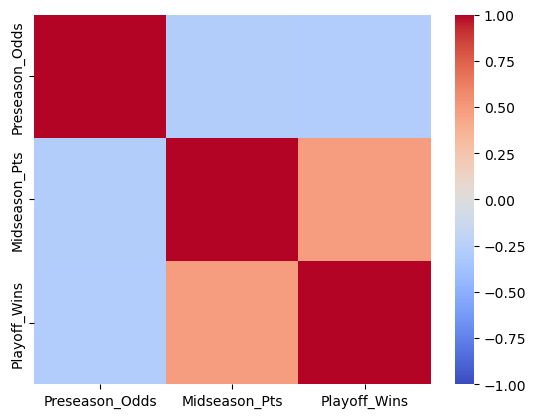

In [16]:
teams_corr = teams[['Preseason_Odds','Midseason_Pts','Playoff_Wins']].corr()
sns.heatmap(teams_corr,cmap='coolwarm',vmin=-1,vmax=1)

In [8]:
X = teams[['Preseason_Odds','Midseason_Pts']]
y = teams['Playoff_Wins']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [9]:
scaler = StandardScaler()

X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.fit_transform(X_test)

In [10]:
lr = LogisticRegression()
logreg = lr.fit(X_train_ss,y_train)
logreg_train_acc = logreg.score(X_train_ss,y_train)
logreg_test_acc = logreg.score(X_test_ss,y_test)
print(logreg_train_acc)
print(logreg_test_acc)

0.639269406392694
0.6181818181818182


In [11]:
logreg.coef_

array([[ 1.06346446, -1.4694275 ],
       [ 0.49768372,  0.24337713],
       [ 0.04608319,  0.44968679],
       [ 0.07193262,  0.37490868],
       [ 0.15162563,  0.09492282],
       [-1.83078963,  0.30653207]])

In [12]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train_ss,y_train)
r_train = clf.score(X_train_ss,y_train)
r_test = clf.score(X_test_ss,y_test)

print(r_train)
print(r_test)

0.6232876712328768
0.6090909090909091


In [13]:
from sklearn.linear_model import Lasso

clf2 = Lasso().fit(X_train_ss,y_train)
l_train = clf2.score(X_train_ss,y_train)
l_test = clf2.score(X_test_ss,y_test)

print(l_train)
print(l_test)

0.0
-3.3398563088482547e-06


With a basic logistic regression model using a standard scaler and default hyperparameters we result in a 64% train accuracy and 62% test accuracy. While I would like to improve upon the accuracy going forward, this is not too bad of a start.

**Next Steps**

I plan to both add some additional features to incorporate my trade and player data, as well as dive further into the modeling.  Again, the plan here was to just get a baseline, but now with more direction, we can play around with hyperparameters, different regression models, and the additional features.